In [ ]:
#get data / data acquisition 
from google.colab import files 
new_file = files.upload()

Saving enrolment_by_study.csv to enrolment_by_study.csv


In [ ]:
#data acquisition 
import pandas as pd
header_names = ['Institution', 'Study ', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010', '2011', '2012']

#df = pd.read_csv('enrolment_by_qualification.csv', skiprows=8, header=None, names = header_names)
df = pd.read_csv('enrolment_by_study.csv', skiprows=8, header=None, names = header_names)
df

,Institution,Study,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,CPUT,Science & technology,47%,46%,50%,50%,50%,47%,47%,48%,49%,50%,48%,50%,50%
1,CPUT,Business & management,32%,34%,30%,31%,31%,33%,32%,32%,30%,29%,30%,29%,31%
2,CPUT,Education,3%,6%,8%,9%,9%,10%,9%,10%,11%,11%,12%,11%,9%
3,CPUT,Other humanities,18%,13%,11%,10%,10%,10%,11%,10%,10%,9%,11%,10%,10%
4,CUT,Science & technology,28%,48%,43%,45%,39%,43%,45%,48%,49%,48%,43%,44%,44%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,WSU,Science & technology,29%,35%,33%,26%,27%,27%,26%,26%,25%,26%,28%,31%,31%
89,WSU,Business & management,35%,32%,26%,27%,29%,33%,34%,31%,29%,26%,32%,28%,27%
90,WSU,Education,4%,8%,9%,15%,15%,21%,19%,19%,23%,21%,17%,17%,18%
91,WSU,Other humanities,32%,25%,33%,32%,28%,19%,21%,23%,23%,27%,23%,24%,24%


In [ ]:
#Remove end of file (deal with the NaN values)
data = df.drop(labels = 92, axis=0)
data

,Institution,Study,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,CPUT,Science & technology,47%,46%,50%,50%,50%,47%,47%,48%,49%,50%,48%,50%,50%
1,CPUT,Business & management,32%,34%,30%,31%,31%,33%,32%,32%,30%,29%,30%,29%,31%
2,CPUT,Education,3%,6%,8%,9%,9%,10%,9%,10%,11%,11%,12%,11%,9%
3,CPUT,Other humanities,18%,13%,11%,10%,10%,10%,11%,10%,10%,9%,11%,10%,10%
4,CUT,Science & technology,28%,48%,43%,45%,39%,43%,45%,48%,49%,48%,43%,44%,44%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,VUT,Other humanities,20%,15%,12%,9%,6%,6%,4%,6%,6%,6%,8%,9%,9%
88,WSU,Science & technology,29%,35%,33%,26%,27%,27%,26%,26%,25%,26%,28%,31%,31%
89,WSU,Business & management,35%,32%,26%,27%,29%,33%,34%,31%,29%,26%,32%,28%,27%
90,WSU,Education,4%,8%,9%,15%,15%,21%,19%,19%,23%,21%,17%,17%,18%


In [ ]:
## Check for NaN
data.isnull().values.any()

False

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Institution  92 non-null     object
 1   Study        92 non-null     object
 2   2000         92 non-null     object
 3   2001         92 non-null     object
 4   2002         92 non-null     object
 5   2003         92 non-null     object
 6   2004         92 non-null     object
 7   2005         92 non-null     object
 8   2006         92 non-null     object
 9   2007         92 non-null     object
 10  2008         92 non-null     object
 11  2009         92 non-null     object
 12  2010         92 non-null     object
 13  2011         92 non-null     object
 14  2012         92 non-null     object
dtypes: object(15)
memory usage: 11.5+ KB


In [ ]:
#check all institutions 
cls = data['Institution'].unique()
print(sorted(cls))

['CPUT', 'CUT', 'DUT', 'Fort Hare', 'MUT', 'NMMU', 'NWU', 'Rhodes', 'Stellenbosch', 'TUT', 'UCT', 'UFS', 'UJ', 'UKZN', 'UL', 'UP', 'UV', 'UWC', 'UZ', 'Unisa', 'VUT', 'WSU', 'Wits']


In [ ]:
#Remove string and replace with int for classification
data['Study'] = data['Study'].replace(['Science & technology','Business & management','Education ', 'Other humanities', 'Humanities'],[0,1,2,3, 4])
data.drop(['Institution'], axis=1).head(12)

,Study,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,0,47%,46%,50%,50%,50%,47%,47%,48%,49%,50%,48%,50%,50%
1,1,32%,34%,30%,31%,31%,33%,32%,32%,30%,29%,30%,29%,31%
2,2,3%,6%,8%,9%,9%,10%,9%,10%,11%,11%,12%,11%,9%
3,3,18%,13%,11%,10%,10%,10%,11%,10%,10%,9%,11%,10%,10%
4,0,28%,48%,43%,45%,39%,43%,45%,48%,49%,48%,43%,44%,44%
5,1,67%,36%,41%,40%,40%,35%,33%,31%,30%,28%,30%,27%,26%
6,2,1%,2%,3%,4%,5%,5%,7%,8%,8%,9%,15%,15%,15%
7,3,4%,14%,13%,11%,16%,17%,16%,14%,13%,15%,13%,14%,15%
8,0,51%,51%,47%,48%,50%,49%,47%,47%,49%,49%,47%,47%,47%
9,1,31%,31%,34%,34%,34%,35%,35%,36%,34%,34%,37%,36%,36%


In [ ]:
#Remove the % sign and leave only the string 
pre_process = data.drop(['Institution'], axis=1)
pre_process['2000'] = pre_process['2000'].str.replace('%', '')
pre_process['2001'] = pre_process['2001'].str.replace('%', '')
pre_process['2002'] = pre_process['2002'].str.replace('%', '')
pre_process['2003'] = pre_process['2003'].str.replace('%', '')
pre_process['2004'] = pre_process['2004'].str.replace('%', '')
pre_process['2005'] = pre_process['2005'].str.replace('%', '')
pre_process['2006'] = pre_process['2006'].str.replace('%', '')
pre_process['2007'] = pre_process['2007'].str.replace('%', '')
pre_process['2008'] = pre_process['2008'].str.replace('%', '')
pre_process['2009'] = pre_process['2009'].str.replace('%', '')
pre_process['2010'] = pre_process['2010'].str.replace('%', '')
pre_process['2011'] = pre_process['2011'].str.replace('%', '')
pre_process['2012'] = pre_process['2012'].str.replace('%', '')
pre_process

,Study,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,0,47,46,50,50,50,47,47,48,49,50,48,50,50
1,1,32,34,30,31,31,33,32,32,30,29,30,29,31
2,2,3,6,8,9,9,10,9,10,11,11,12,11,9
3,3,18,13,11,10,10,10,11,10,10,9,11,10,10
4,0,28,48,43,45,39,43,45,48,49,48,43,44,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,3,20,15,12,9,6,6,4,6,6,6,8,9,9
88,0,29,35,33,26,27,27,26,26,25,26,28,31,31
89,1,35,32,26,27,29,33,34,31,29,26,32,28,27
90,2,4,8,9,15,15,21,19,19,23,21,17,17,18


In [ ]:
pre_process.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Study   92 non-null     int64 
 1   2000    92 non-null     object
 2   2001    92 non-null     object
 3   2002    92 non-null     object
 4   2003    92 non-null     object
 5   2004    92 non-null     object
 6   2005    92 non-null     object
 7   2006    92 non-null     object
 8   2007    92 non-null     object
 9   2008    92 non-null     object
 10  2009    92 non-null     object
 11  2010    92 non-null     object
 12  2011    92 non-null     object
 13  2012    92 non-null     object
dtypes: int64(1), object(13)
memory usage: 10.8+ KB


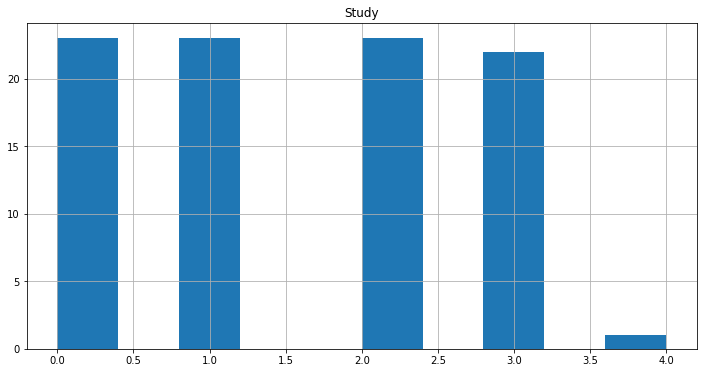

In [ ]:
import matplotlib.pyplot as plt

pre_process.hist()
his = plt.gcf()
his.set_size_inches(12, 6)
plt.show()

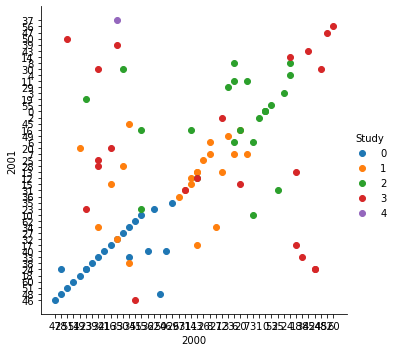

In [ ]:
import seaborn as sns
sns.FacetGrid(pre_process, hue = 'Study', height = 5).map(plt.scatter, '2000', '2001').add_legend()
plt.show()

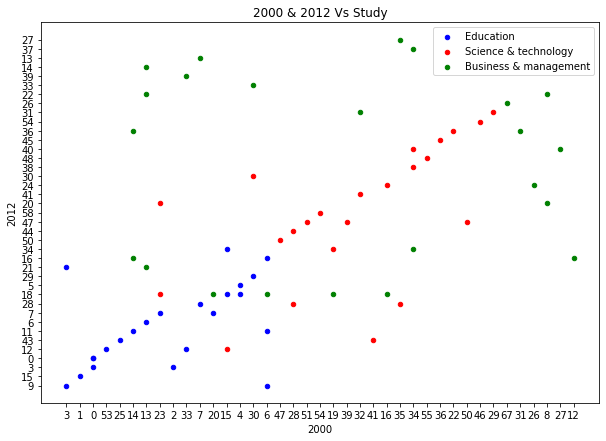

In [ ]:
pet_len_wid = pre_process[pre_process.Study == 2].plot(kind = 'scatter', x = '2000', y = '2012',color = 'blue', label = 'Education')
pre_process[pre_process.Study == 0].plot(kind = 'scatter', x = '2000', y = '2012', color = 'red', label = 'Science & technology', ax = pet_len_wid)
pre_process[pre_process.Study == 1].plot(kind = 'scatter', x = '2000', y = '2012', color = 'green', label = 'Business & management', ax = pet_len_wid)
pet_len_wid.set_xlabel('2000')
pet_len_wid.set_ylabel('2012')
pet_len_wid.set_title('2000 & 2012 Vs Study')
pet_len_wid = plt.gcf()
pet_len_wid.set_size_inches(10, 7)
plt.show()

In [ ]:
pre_process = pre_process.sample(frac = 1)
pre_process

,Study,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
20,0,23,24,21,21,21,21,22,18,18,19,18,19,20
51,3,23,23,20,22,21,21,21,21,21,21,20,21,23
66,2,3,10,11,9,11,11,11,11,13,16,16,20,21
25,1,13,17,15,16,14,15,15,15,15,15,24,22,21
1,1,32,34,30,31,31,33,32,32,30,29,30,29,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2,3,6,8,9,9,10,9,10,11,11,12,11,9
57,1,8,6,7,10,13,14,14,25,12,11,16,18,20
58,2,4,4,16,18,19,19,15,7,13,6,5,5,5
84,0,46,40,39,45,42,44,48,52,53,53,51,52,54


In [ ]:
#convert the string to int (astype(int)) then only get access to data from 2000 to 2012 leaving the study column

#all_inputs = pre_process[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010', '2011', '2012']].astype(int)
all_inputs = pre_process.drop('Study', axis=1).values.astype(int)
all_inputs

array([[23, 24, 21, ..., 18, 19, 20],
       [23, 23, 20, ..., 20, 21, 23],
       [ 3, 10, 11, ..., 16, 20, 21],
       ...,
       [ 4,  4, 16, ...,  5,  5,  5],
       [46, 40, 39, ..., 51, 52, 54],
       [35, 32, 26, ..., 32, 28, 27]])

In [ ]:
all_inputs.shape

(92, 13)

In [ ]:
import numpy as np
all_labels = np.ravel(pre_process[['Study']].astype(int))

In [ ]:
all_labels.shape

(92,)

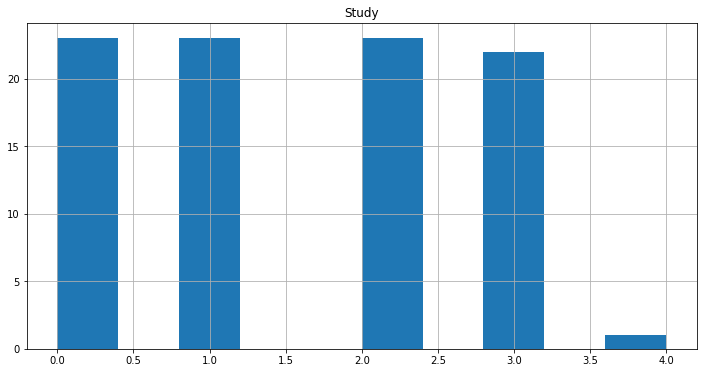

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_inputs, all_labels, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#
from sklearn import model_selection
scaler = MinMaxScaler() # first scaler
#dt = X2
#data = scaler.fit_transform(X)

from sklearn.preprocessing import StandardScaler
trans = StandardScaler() # second scaler


from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
pipeline_min_max = Pipeline(steps=[('t', scaler), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
from sklearn.model_selection import  cross_val_score
n_scores = cross_val_score(pipeline_min_max, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('MinMax Scaler Train Accuracy:  ')
print(n_scores.mean() * 100, n_scores.std() * 100)

#print("\n")

pipeline = Pipeline(steps=[('t', trans), ('m', model)])
scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Standard Scaler Train Accuracy:  ')
print(scores.mean() * 100, scores.std() * 100)

## MIN MAX SCALER ACHIEVES THE BEST ACCURACY OF 57% AND STANDARD SCALER HAS AN ACCURACY OF 56%
## MINMAZ IS THEREFORE A BETTER SCALER THAN STANDARD SCALER

pipeline_min_max_test = Pipeline(steps=[('t', scaler), ('m', model)])
n_scores_test = cross_val_score(pipeline_min_max_test, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('MinMax Scaler Test Accuracy:  ')
print(n_scores_test.mean() * 100, n_scores_test.std() * 100)

pipeline_test = Pipeline(steps=[('t', trans), ('m', model)])
scores_test = cross_val_score(pipeline_test, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Standard Scaler Test Accuracy:  ')
print(scores_test.mean() * 100, scores_test.std() * 100)
from sklearn.metrics import *
###Classification report on test data
#minmax
pipeline_min_max_test.fit(X_train, y_train)
y_pred = pipeline_min_max_test.predict(X_test)
print(classification_report(y_test, y_pred))

#standardscaler
pipeline_test.fit(X_train, y_train)
y_p = pipeline_test.predict(X_test)
print(classification_report(y_test, y_p))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

MinMax Scaler Train Accuracy:  
45.68376068376069 13.605189308746027
Standard Scaler Train Accuracy:  
45.17094017094018 13.722274792479293
MinMax Scaler Test Accuracy:  
40.888888888888886 18.79584929225822
Standard Scaler Test Accuracy:  
41.111111111111114 21.591036091539767
              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.17      0.20      0.18         5
           2       0.71      0.71      0.71         7
           3       0.67      0.22      0.33         9

    accuracy                           0.43        28
   macro avg       0.47      0.43      0.41        28
weighted avg       0.51      0.43      0.42        28

              precision    recall  f1-score   support

           0       0.33      0.57      0.42         7
           1       0.17      0.20      0.18         5
           2       0.71      0.71      0.71         7
           3       0.67      0.22      0.33         9

    accuracy  

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#
from sklearn import model_selection
scaler = MinMaxScaler() # first scaler
#dt = X2
#data = scaler.fit_transform(X)

from sklearn.preprocessing import StandardScaler
trans = StandardScaler() # second scaler


from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
pipeline_min_max = Pipeline(steps=[('t', scaler), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
from sklearn.model_selection import  cross_val_score
n_scores = cross_val_score(pipeline_min_max, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('MinMax Scaler Train Accuracy:  ')
print(n_scores.mean() * 100, n_scores.std() * 100)

print("\n")

pipeline = Pipeline(steps=[('t', trans), ('m', model)])
scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Standard Scaler Train Accuracy:  ')
print(scores.mean() * 100, scores.std() * 100)

## MIN MAX SCALER ACHIEVES THE BEST ACCURACY OF 57% AND STANDARD SCALER HAS AN ACCURACY OF 56%
## MINMAZ IS THEREFORE A BETTER SCALER THAN STANDARD SCALER

pipeline_min_max_test = Pipeline(steps=[('t', scaler), ('m', model)])
n_scores_test = cross_val_score(pipeline_min_max_test, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('MinMax Scaler Test Accuracy:  ')
print(n_scores_test.mean() * 100, n_scores_test.std() * 100)

pipeline_test = Pipeline(steps=[('t', trans), ('m', model)])
scores_test = cross_val_score(pipeline_test, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Standard Scaler Test Accuracy:  ')
print(scores_test.mean() * 100, scores_test.std() * 100)
from sklearn.metrics import *
###Classification report on test data
#minmax
pipeline_min_max_test.fit(X_train, y_train)
y_pred = pipeline_min_max_test.predict(X_test)
print(classification_report(y_test, y_pred))

#standardscaler
pipeline_test.fit(X_train, y_train)
y_p = pipeline_test.predict(X_test)
print(classification_report(y_test, y_p))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

MinMax Scaler Train Accuracy:  
33.80341880341881 14.573464147472013


Standard Scaler Train Accuracy:  
33.84615384615385 13.17085420139777
MinMax Scaler Test Accuracy:  
52.22222222222223 13.535504295858722
Standard Scaler Test Accuracy:  
52.888888888888886 18.493909574722828
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.25      0.40      0.31         5
           2       0.67      0.86      0.75         7
           3       0.20      0.11      0.14         9

    accuracy                           0.46        28
   macro avg       0.45      0.48      0.45        28
weighted avg       0.44      0.46      0.44        28

              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.12      0.20      0.15         5
           2       0.67      0.86      0.75         7
           3       0.20      0.11      0.14         9

    accuracy 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#
from sklearn import model_selection
scaler = MinMaxScaler() # first scaler
#dt = X2
#data = scaler.fit_transform(X)

from sklearn.preprocessing import StandardScaler
trans = StandardScaler() # second scaler


from sklearn.model_selection import  cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import PCA
# model = PCA(n_components=2)

# x = StandardScaler().fit_transform(x)

# principalComponents = pca.fit_transform(x)
# pca.explained_variance_ratio_



# train_img = pca.transform(train_img)
# test_img = pca.transform(test_img)

from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
#train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(X_train)
test_img = scaler.transform(X_test)


from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

pca.fit(X_train) #training set



train_img = pca.transform(X_train) #training 
test_img = pca.transform(X_test) #test

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(X_train, y_train)


# Predict for One Observation (image)
#logisticRegr.predict(X_test)


# Predict for One Observation (image)
logisticRegr.predict(X_test)

logisticRegr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.75

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(X_train)
test_img = scaler.transform(X_test)

from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

pca.fit(X_train) #training set



train_img = pca.transform(X_train) #training 
test_img = pca.transform(X_test) #test

from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=4200, random_state=42, C=0.5)
model.fit(X_train,y_train)
model.predict(X_test)

model.score(X_test, y_test)

0.46420628839709843

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
#code here
decision_tree_classifier = DecisionTreeClassifier()

In [ ]:
decision_tree_classifier.fit(training_inputs, training_classes)

DecisionTreeClassifier()

In [ ]:
decision_tree_classifier.score(testing_inputs, testing_classes)

0.5263157894736842

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(training_inputs, training_classes)

knn.score(testing_inputs, testing_classes)


0.47368421052631576

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel="poly", C=0.025, random_state=42)
svm.fit(training_inputs, training_classes)
svm.score(testing_inputs, testing_classes)

0.47368421052631576

In [ ]:
from sklearn.linear_model import SGDClassifier
SDG = SGDClassifier(loss='modified_huber', shuffle=True, random_state=42)
SDG.fit(training_inputs, training_classes)
SDG.score(testing_inputs, testing_classes)



0.47368421052631576

In [ ]:
#parts below are data expoloration...yet to be refined. 


science = data.head(12).drop(['Study'], axis=1)
science 

,Institution,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,CPUT,47%,46%,50%,50%,50%,47%,47%,48%,49%,50%,48%,50%,50%
1,CPUT,32%,34%,30%,31%,31%,33%,32%,32%,30%,29%,30%,29%,31%
2,CPUT,3%,6%,8%,9%,9%,10%,9%,10%,11%,11%,12%,11%,9%
3,CPUT,18%,13%,11%,10%,10%,10%,11%,10%,10%,9%,11%,10%,10%
4,CUT,28%,48%,43%,45%,39%,43%,45%,48%,49%,48%,43%,44%,44%
5,CUT,67%,36%,41%,40%,40%,35%,33%,31%,30%,28%,30%,27%,26%
6,CUT,1%,2%,3%,4%,5%,5%,7%,8%,8%,9%,15%,15%,15%
7,CUT,4%,14%,13%,11%,16%,17%,16%,14%,13%,15%,13%,14%,15%
8,DUT,51%,51%,47%,48%,50%,49%,47%,47%,49%,49%,47%,47%,47%
9,DUT,31%,31%,34%,34%,34%,35%,35%,36%,34%,34%,37%,36%,36%


Text(0.5, 1.0, 'Numn')

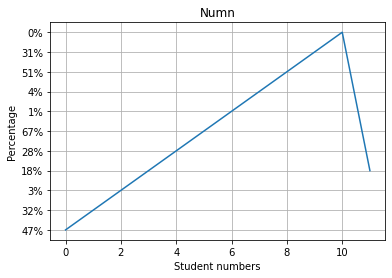

In [ ]:

import matplotlib.pyplot as plt
plt.plot(science['2000'])
plt.grid()
plt.xlabel('Student numbers')
plt.ylabel('Percentage')
plt.title('Numn')

TypeError: ignored

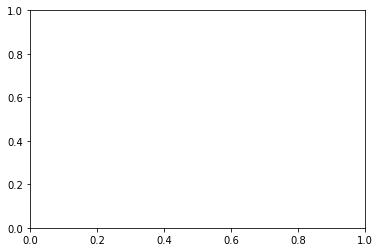

In [ ]:
# import matplotlib.pyplot as plt
# plt.plot(science)
# plt.grid()
# plt.xlabel('Student numbers')
# plt.ylabel('Percentage')
# plt.title('Numn')

  Study 2000 2001 2002 2003 2004 2005
0     0  47%  46%  50%  50%  50%  47%
1     1  32%  34%  30%  31%  31%  33%
2     2   3%   6%   8%   9%   9%  10%
3     3  18%  13%  11%  10%  10%  10%


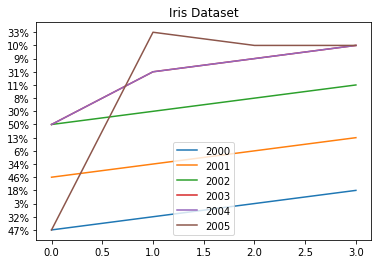

In [ ]:
new_data = data.head(4).drop(['Institution', '2006', '2007', '2008', '2009', '2010', '2011', '2012'], axis=1)
print(new_data)
# get columns to plot
columns = new_data.columns.drop(['Study'])
# create x data
x_data = range(0, new_data.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, new_data[column], label=column)
# set title and legend
ax.set_title('Iris Dataset')
ax.legend()

Text(0, 0.5, 'sepal_width')

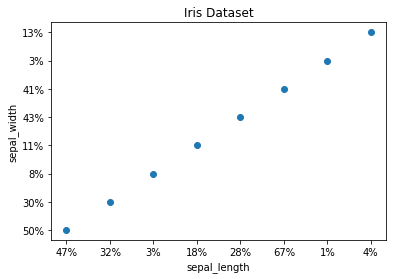

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(new_data['2000'], new_data['2002'])
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

Text(0.5, 1.0, 'Numn')

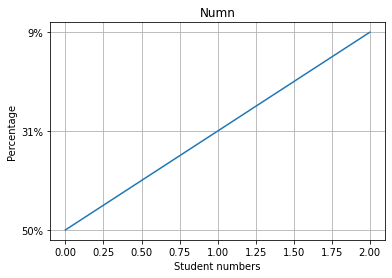

In [ ]:
import matplotlib.pyplot as plt
plt.plot(stats_2012)
plt.grid()
plt.xlabel('Student numbers')
plt.ylabel('Percentage')
plt.title('Numn')

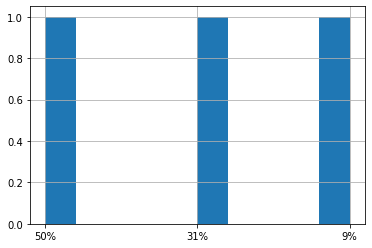

In [ ]:
stats_2012.hist()

In [ ]:
stats_2010= data['2010']
stats_2010

0     94%
1      3%
2      3%
3     96%
4      2%
     ... 
64     0%
65     1%
66    96%
67     3%
68     1%
Name: 2010, Length: 69, dtype: object

Text(0.5, 1.0, 'Numn')

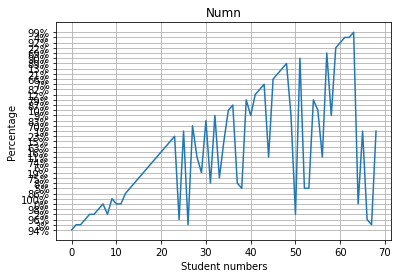

In [ ]:
import matplotlib.pyplot as plt
plt.plot(stats_2010)
plt.grid()
plt.xlabel('Student numbers')
plt.ylabel('Percentage')
plt.title('Numn')

In [ ]:
stats_CPUT= data.head(3)
stats_CPUT

,Institution,Qualification,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,CPUT,Undergraduates,99%,98%,98%,97%,96%,96%,96%,96%,95%,94%,94%,95%,95%
1,CPUT,Postgraduate up to masters,0%,1%,1%,1%,2%,2%,2%,2%,3%,3%,3%,2%,2%
2,CPUT,Masters and doctors,1%,1%,2%,2%,2%,2%,2%,2%,3%,3%,3%,3%,3%


In [ ]:
data2 = stats_CPUT['2000']
data2

0    99%
Name: 2000, dtype: object

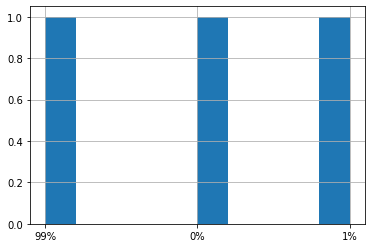

In [ ]:
data2.hist()

Text(0.5, 1.0, 'Numn')

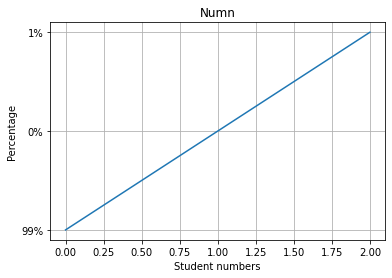

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data2)
plt.grid()
plt.xlabel('Student numbers')
plt.ylabel('Percentage')
plt.title('Numn')